# Project Title: Bank Churn Analysis

### Problem Statement: 
1. Despite the ongoing attempts to attract and keep customers, the banking sector grapples with an onging issue of customers leaving, resulting in financial setbacks and lower customer satisfaction.
2. There is a pressing need for Data-Driven startegies to proactively address this challenge and improve customer retention.

### Project Objective:
This project seeks to examine and understand the reasons behind customer churn in the banking industry.

### Project Overview:
1. Churn refers to customers leaving the bank or discontinuing their banking services.
2. Banking Churn Analysis is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.

### Table of Contents:

1. Importing Libraries & Dataset
2. Data Wrangling
     - Data Cleaning
     - Handling Missing Values
     - Handling Inconsistencies
3. Exploratory Data Analysis(EDA)
     - Visualizing Dependent Variable
     - Visualizing Independent Variable
     - Generalizing Insights
4. Data PreProcessing
     - Variable Selection and Importance
     - Feature Transformation, Scaling, and Encoding
     - Splillting Data for Model Training
     - Appling SMOTE to reduce class imbalance

### Key Perforrmance Indicators(KPIs):
Churn Rate: 
KPI : Calculate the percentage of customers who have discontinued or churned with respect to gender, age, tenure, balance, NumOfProducts, hsCrCard, IsActiveMember, EstimatedSalary. 
Target: Reduce the Churn Rate


### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style = "darkgrid", font_scale=1.5)


from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### Loading Dataset

In [2]:
df = pd.read_csv("/Users/zachariah/Downloads/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Basic Understanding of Data

### 1. Checking the Dimensions of Dataset.

In [4]:
print("Total Number of Records(rows) in the Dataset is: ",df.shape[0])
print("Total Number of Attributes(columns) in the Dataset is: ",df.shape[1])

Total Number of Records(rows) in the Dataset is:  10000
Total Number of Attributes(columns) in the Dataset is:  14


### 2. Fetching the Attribute Names.

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Inference:

1. #### RowNumber:
        It is likely a unique Identifier for each record and does not contribute to the analysis.
2. #### CustomerId: 
        It can be used to track and differentiate individual customers within the dataset.
3. #### Surname: 
        It provides information about the family name of each customer.
4. #### CreditScore: 
        It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
5. #### Geography:
        It provides information about the customer's geographic distribution, allowing for analysis based on regional or national factors.
6. #### Gender: 
        It categorizes customers as either Male or Female enabling gender-based analysis if relevant to the churn process.
7. #### Age: 
        It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8. #### Tenure:
        It Typically represents the number of years or months the customer has been associated with the bank.
9. #### Balance: 
        It reflects the amount of money in the customer's bank account at a specific point in time.
10. #### NumOfProducts:
         It can include various offerings such as savings accounts, loans, credit cards, etc
11. #### hasCrCard: 
         It is a binary value with a value of 1 if the customer possesses a credit card and 0 otherwise.
12. #### IsActiveMember: 
         It is a binary variable indicating whether the customer is an active member(1) or not(0) within the bank.
13. #### EstimatedSalary: 
         It provides an approximation of the customer's income level, which can be relevant for analyzing churn 
         behavior.
14. #### Exited: 
         It indicateds whether a customer has churned(1) or not(0) from the bank. 
         It is a variable we aim to predict using the other features.

### 3.  Generating Basic Information of the Data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Inference

* There is a total of 10000 records and 14 columns available in the dataset. Out of the 14 columns, there are 11 numerical columns and 3 categorical columns.

### 4. Computing Total No.Of Missing Values.

In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No.Of Missing Values"})

,Total No.Of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Inference

* None of the columns is having missing values
* So we don't have to perform Data Imputation.

### 5. Checking Duplicate Records

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Inference

* There are no duplicate records present in the dataset.
* So we can say there is no Data Leakage in the dataset.

### 6. Performing Descriptive Statistical Analysis on Categorical Columns.

In [9]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


### Inference

* Surname column is having very high cardinality and not relevant for predicting customer churned or not. 
  So, we can drop this feature.
* Geography & Gender columns are having low cardinality and seem relevant for predicting customer churned or not.


## Data Wrangling

* Data wrangling, also known as data munging, refers to the process of cleaning, transforming, and preparing raw data for analysis.
* It involves handling missing values, addressing inconsistencies, and formatting data before it can be used for further analysis.


### 1. Showing Random Sample od Data.

In [10]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8304,8305,15792868,Mickey,675,France,Male,69,1,0.00,2,1,0,157097.09,0
7298,7299,15789865,Nnaife,620,France,Male,28,9,71902.52,1,0,1,190208.23,0
2212,2213,15770974,Nwabugwu,741,Germany,Female,37,8,170840.08,2,0,0,109843.16,0
3372,3373,15643967,Chineze,652,France,Female,37,4,92208.54,1,0,1,197699.80,1
5169,5170,15775430,Tsou,651,Germany,Male,31,7,138008.06,2,1,0,129912.74,0


### Inference

* RowNumber and CustomerId columns represent a unique value for each customer and doesn't seem relevant for predicting customer churned out or not.
* Surname column is having HIGH cardinality and doesn't seem relevant for predicting customer churned or not.
* So, we can simply drop these features.

### 2. Dropping Insignificant Features.

In [11]:
df.drop(columns=["RowNumber","CustomerId","Surname"], inplace=True)

### 3. Renaming Target Variable name and its value with more appropriate values for better Analysis.

In [12]:
df.rename(columns={"Exited":"Churned"}, inplace=True)

In [13]:
df["Churned"].replace({0:"No",1:"Yes"}, inplace=True)


In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churned          10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


### Inference

* We have converted raw data into well-structured data for better analysis.
* So, we can perform Exploratory Data Analysis(EDA) and derive insights from the data.

## Exploratory Data Analysis

### 1. Visualizing Target Variable

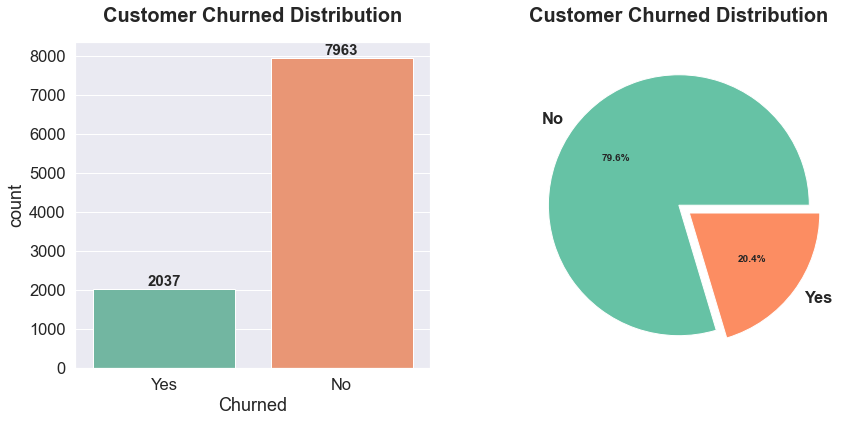

In [16]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df, x="Churned", palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=15, fontweight="black")
plt.title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)

plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"), textprops={"fontweight": "bold"}, explode=[0, 0.1])
plt.title("Customer Churned Distribution", fontweight="bold", size=20, pad=20)
plt.show()

### Inference

* There is a huge class-imbalance which can lead to bias in model performance.
* So to overcome this class-imbalance we have to use over-sampling technique from SMOTE

### 2. Visualizing Customer Churned by Gender

In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

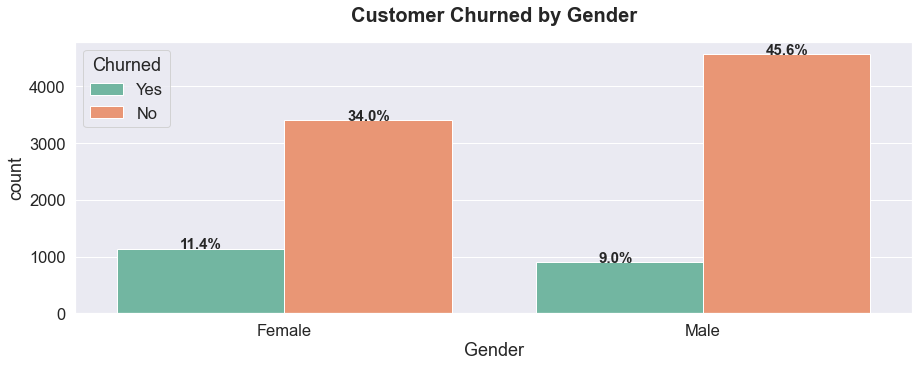

In [18]:
countplot("Gender")

### Inference

* The churned probability is more for FEMALE Customers compared to MALE Customers.
* Which means Female Customers are more deactivating their banking facilities comapared to Male Customers.

### Recommendation:

* Bank can Develop targeted marketing campaign specifically tailored to Female Customers.
* Bank can Focus on enhancing the overall customer experience for Female Customers.

### 3. Visualizing Customer Churned by Geographical Region.

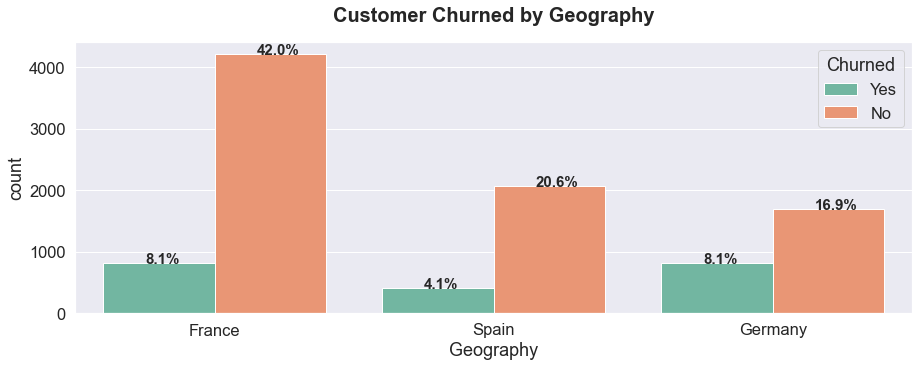

In [19]:
countplot("Geography")

### Inference

* HALF of the Customers are from France followed by Germany and Spain.
* Despite the huge Total Customers Difference between France & Germany, the Churned Rate for France and Germany are the same.
* There are almost Equal Customers from Germany and Spain, but the Churn Rate is almost double in Germany when compared to Spain.

### Recommendation:

* Bank can Analyze the Banking Facilities and Behavior of Customers from France and try to implement those in Germany. 

### 4. Visualizing Customer Churn by "HasCrCard"

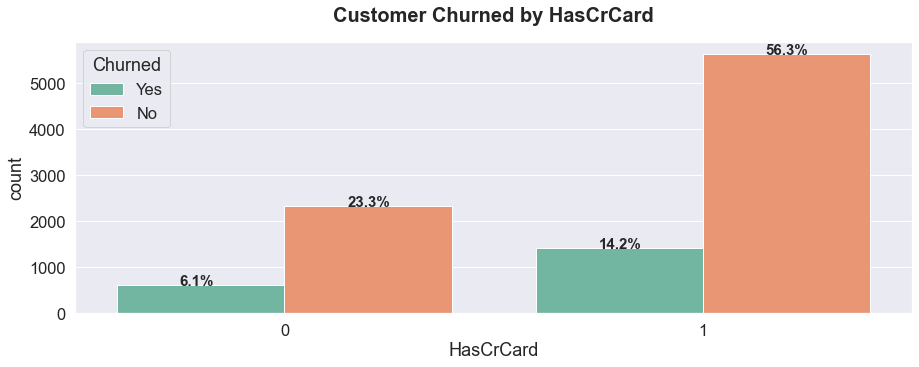

In [20]:
countplot("HasCrCard")

### Inference

* More Than 70% of Customers have credit cards.
* The Churn Probabilty value for bith the categories is almost 1:4
* So credit card is not affecting the churn of customers.

### 5. Visualizing Customer Churned by "NumOfProducts"

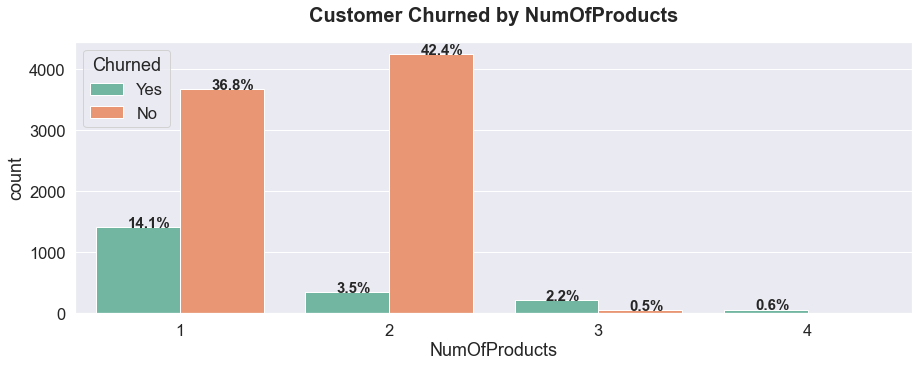

In [21]:
countplot("NumOfProducts")

### Inference

* Most of the Customers are having either 1 or 2 Total number of banking products.
* Very few Customers are having more than 2 total number of banking products.
* The Lowest Churn Rate is with Customers having ONLY 2 Products.
* The Very High Churn Rate in customers having 1 product or more than 2 products.
* NOTE:
    1. We can do **Feature Engineering** by grouping the Customers having more than 2 products together to reduce the class imbalance.
    2. Because Class Imbalance leads to bias in model and misinterpretation of minority class.

### Recommendation:

* The bank can convince the customers to have atleast 2 banking products.
* They can provide Rewards and Incentives to the customers having atleast 2 banking products.


### 6. Visualizing Customer Churned By "IsActiveMember"

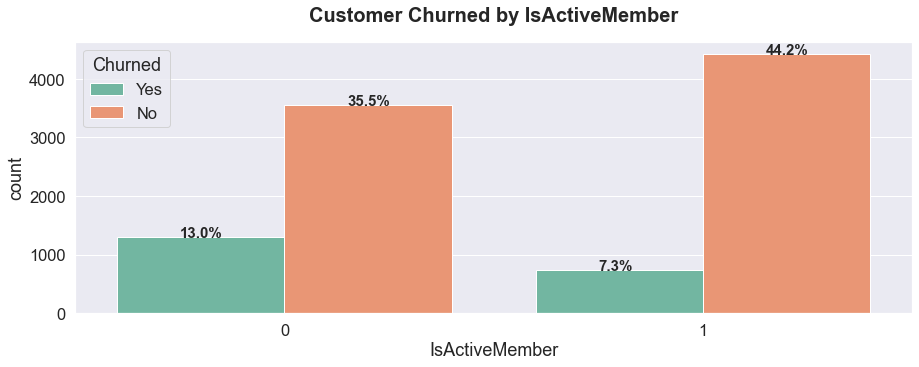

In [22]:
countplot("IsActiveMember")

### Inference

* There is approximately equal number of customers who are either Active or Not Active.
* But the Churn rate % in Not Active Customers is almost double compared to Active Customers.
* So, Customers which are not active are more likely to deactivate their banking facilities.

### Recommendation:

* Bank can provide Regular Communication and Updates, and Enhanced Digital Servces, so that customers remain active to the Banking Facilities.

### 7. Visualizing Customer Churned by "Tenure"

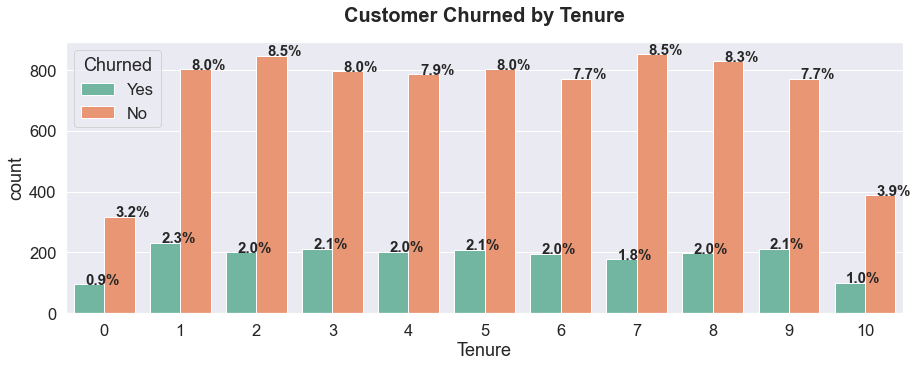

In [23]:
countplot("Tenure")

### Inference

* The highest tenure is 10 years, which means that those customers have opened their account 10 yearss back
* Since there is almost similar distribution of churn rates, we can't make any specific inference.

### 8. Visualizing Customer Churned By "CreditScore"

In [24]:
def continous_plot1(column):
    plt.figure(figsize=(13,6))
    
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=column, hue="Churned", kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)
    
    plt.tight_layout()
    plt.show()

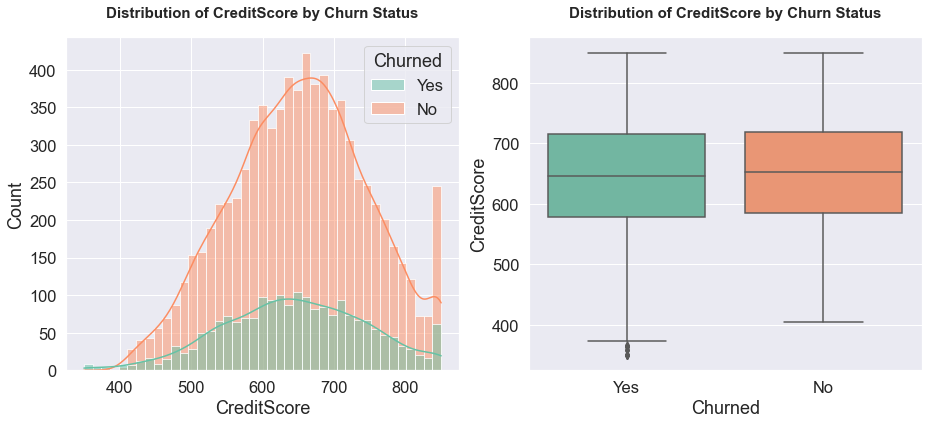

In [25]:
continous_plot1("CreditScore")

### Inference

* The Median CreditScore of both Churned and Not Churned Customers are approximately equal.
* Since the values are approximately equal for both churn status we can't generate any relevant inference.


### 9. Visualizing Customer Churned by "Age"

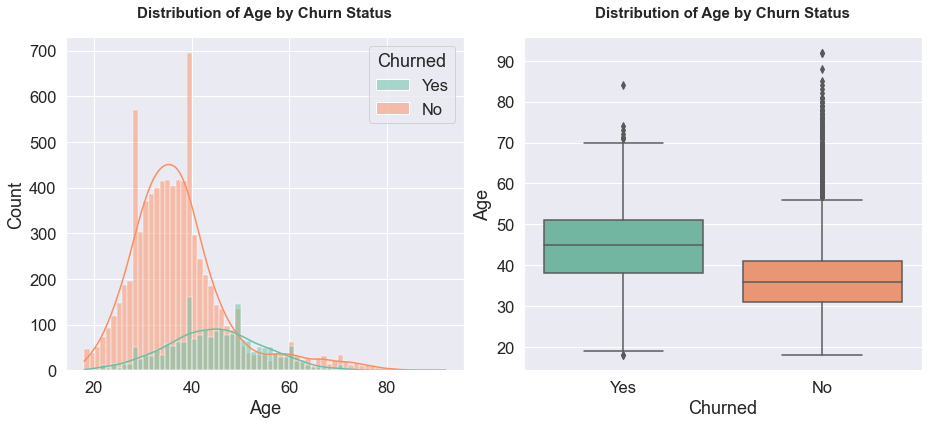

In [26]:
continous_plot1("Age")

### Inference

* The distribution is right skewed because of prescence of outliers which can lead to overfitting in the model.
* To overcome this right-skewed distribution, we can use log normal transformation technque tobring a normal distribution.

### 10. Visualizing Customer Churned By "Balance"

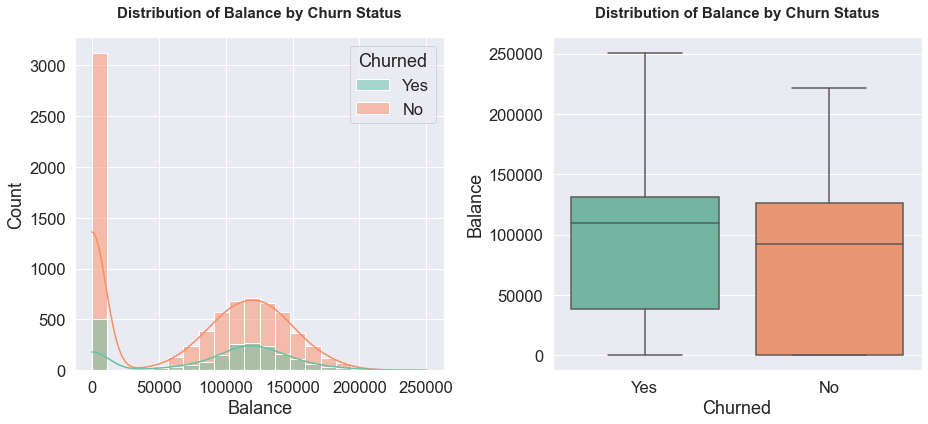

In [27]:
continous_plot1("Balance")

### Inference

* More than 3000 Customers have their account balance equal to zero.
* Customers with zero balance are likely to deactivate their account.
* Excluding the zero value , we observe a normal distribution. So, don't have to use any other tchniques.

* Note :
    * We can do **Feature Engineering** by grouping the customers with account balance zero and balance more than zero separately.

### 11. Visualizing Customerd Churned By "Estimated Salary"

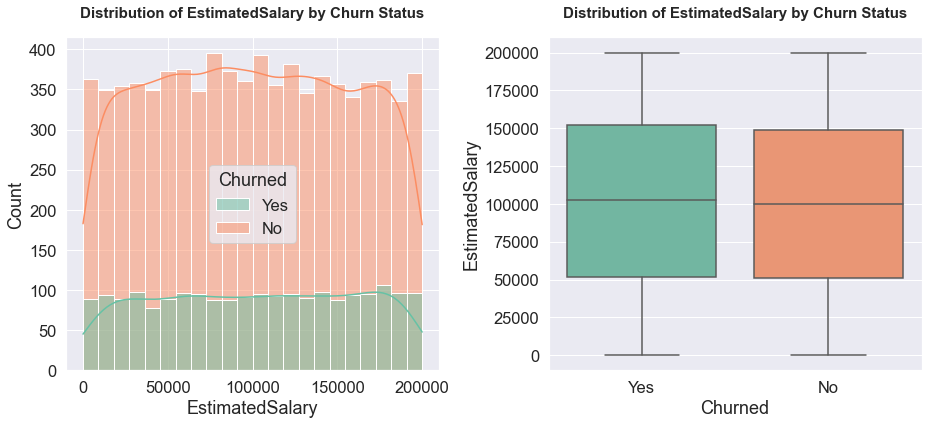

In [28]:
continous_plot1("EstimatedSalary")

### Inference

* The Median Value of EstimatedSalary is approximately same for both the churned categories.
* Since the distribution is kind of similar for both the churn categories, we can't make any relevant inference.


## Feature Engineering

### 1. Creating New Feature From "NumberOfProducts" feature.

In [29]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [30]:
df["Total_Products"] = np.select(conditions,values)

In [31]:
df.drop(columns="NumOfProducts", inplace=True)

### Visualizing The New Feature "Total_Products".

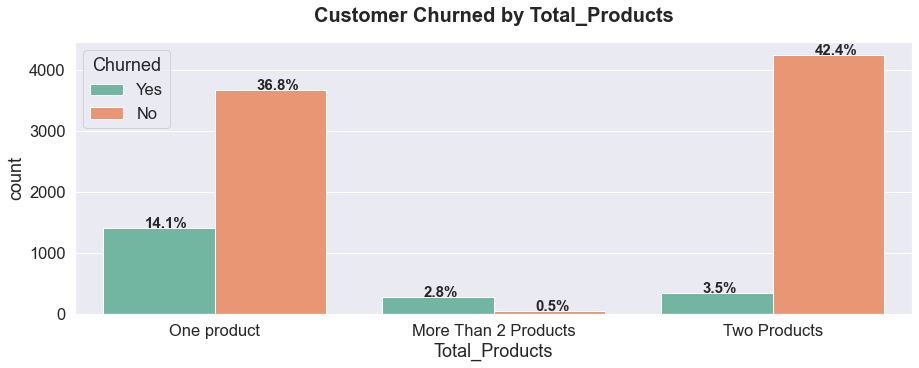

In [32]:
countplot("Total_Products")

### 2. Creating New Feature From "Balance" feature.

In [33]:
conditions = [(df["Balance"] == 0), (df["Balance"]>0)]
values = ["Zero Balance", "More than Zero Balance"]

In [34]:
df["Account_Balance"] = np.select(conditions, values)

In [35]:
df.drop(columns = "Balance", inplace=True)

### Visualizing the New Feature "Account_Balance"

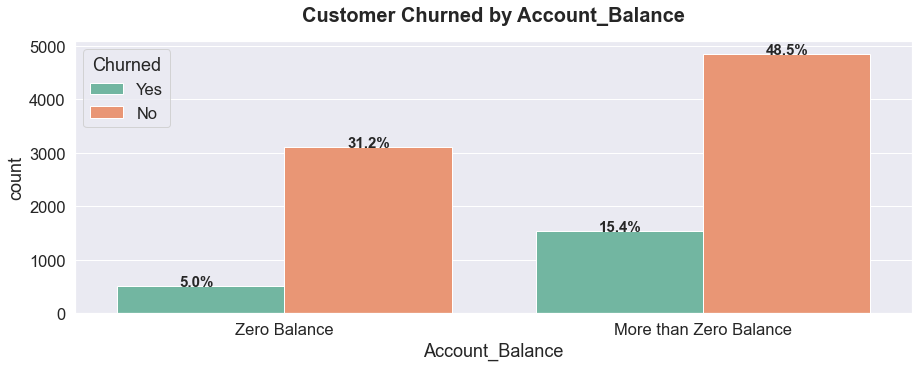

In [36]:
countplot("Account_Balance")

## Data Preprocessing

### 1. Computing Unique values of Categorical Columns.

In [37]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More than Zero Balance']
---------------------------------------------------------------------------------------------------- 



### 2. Performing One Hot Encoding on Categorical Features.

In [38]:
df = pd.get_dummies(columns=cat_cols, data=df)

### 3. Encoding Target Variable.

In [39]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [40]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More than Zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


### 4. Checking the Skewness of Continous Features.

In [41]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [42]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


### Inference

* **Age Feature** is **Highly Right-Skewed**, which indicates there is prescence of **positive outliers**.
* **Skewness** can **negatively** impact the **performance** of certain machine learning algortihms, like 
  **DecisionTree** and **Linear Models**.
* To ovecome the **right-skewed distribution**, we can use **log normal transformation** to achieve a 
**normal distribution**.

### 4. Performing the Log Transformation on "Age" Column.

In [43]:
old_age = df["Age"] ## Store the original age values to compare with the transformed values.

In [44]:
df["Age"] = np.log(df["Age"])

### 5. Visualizing Age Before and After Transformation

### Inference

* After applying **log normal transformation** the **age feature has achieved** a **normal distribution**.
* This will **help model** to find more **relevant patterns** and build more **accurate model**.

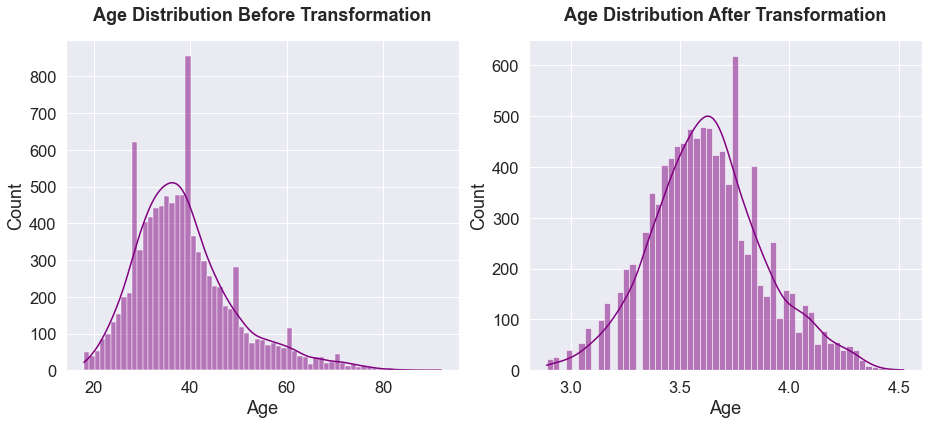

In [45]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

### 6. Segregating Features & Labels For Model Training.

In [46]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

### Inference

* Data is **equally splitted** for **Model Training & Testing** 
* So, we can build a **Predictiove Model** to find the **Key Factors** that are significantly influencing **customer churn**
